## Little training monitor

Tails a `lighting_logs/version_X` directory for train/val loss.

In [1]:
# %pip install datasets transformers zstandard matplotlib
import torch
import text_data
import conv_text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


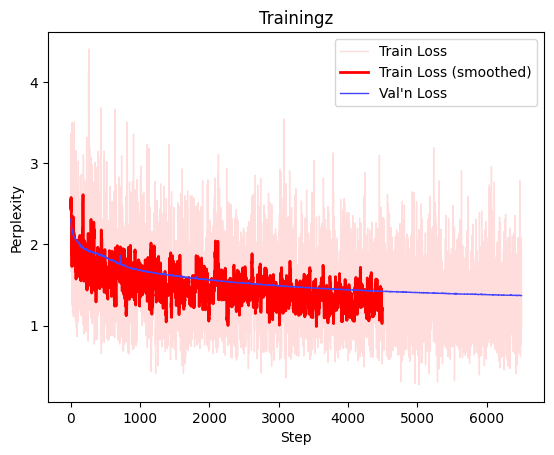

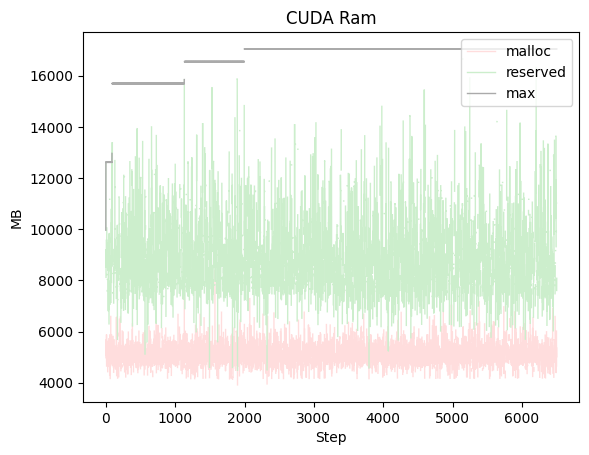

In [5]:
tdat = pd.read_csv('lightning_logs/version_40/metrics.csv')
train = tdat.train_loss[~np.isnan(tdat.train_loss)]

xspace = np.linspace(0, len(train), len(train))
fsz = max(100, len(train)//20)
fsz=len(train) // 20
filter = np.ones(fsz)/fsz
# filter =  np.linspace(0.25, 1.75, num=fsz)/fsz


plt.plot( train, label = 'Train Loss', color='#fdd', linewidth=1)
plt.plot( np.convolve(train, filter, mode='valid'), label = 'Train Loss (smoothed)', color='r', linewidth=2)
if 'val_loss' in tdat.columns:
    val = tdat.val_loss[~np.isnan(tdat.val_loss)]
    plt.plot( val, label = 'Val\'n Loss', color='#44f', linewidth=1)

plt.xlabel('Step')
plt.ylabel('Perplexity')
plt.legend(loc='upper right')
plt.title('Trainingz')
plt.show()

plt.plot( tdat.traincuda_malloc_mb, label = 'malloc', color='#fdd', linewidth=1)
plt.plot( tdat.traincuda_reserved_mb, label = 'reserved', color='#cec', linewidth=1)
plt.plot( tdat.traincuda_max_reserved_mb, label = 'max', color='#aaa', linewidth=1)

plt.xlabel('Step')
plt.ylabel('MB')
plt.legend(loc='upper right')
plt.title('CUDA Ram')
plt.show()


In [3]:
np.mean(tdat.train_loss[-100:])


1.2711689735668292

In [4]:
tdat.val_loss[~np.isnan(tdat.val_loss)]

2       2.309979
5       2.265589
8       2.240725
12      2.202934
15      2.185571
          ...   
6487    1.369984
6490    1.372418
6494    1.370348
6497    1.371136
6500    1.370405
Name: val_loss, Length: 2000, dtype: float64

In [5]:
tdat[-100:]

,train_loss,length,traincuda_malloc_mb,traincuda_reserved_mb,traincuda_max_reserved_mb,epoch,step,val_loss,valcuda_malloc_mb,valcuda_reserved_mb,valcuda_max_reserved_mb
6403,NaN,214.5,NaN,NaN,NaN,1,443418,1.371982,2909.098389,8942.000000,17042.0
6404,1.688425,114.0,4638.979004,8942.0,17042.0,1,443499,NaN,NaN,NaN,NaN
6405,1.159591,70.0,4442.414062,8666.0,17042.0,1,443599,NaN,NaN,NaN,NaN
6406,NaN,214.5,NaN,NaN,NaN,1,443643,1.372262,2909.092529,9697.855469,17042.0
6407,1.157644,168.0,4879.404297,12296.0,17042.0,1,443699,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6498,1.241096,423.0,6019.031250,11020.0,17042.0,1,449999,NaN,NaN,NaN,NaN
6499,2.074750,117.0,4652.191895,11020.0,17042.0,1,450099,NaN,NaN,NaN,NaN
6500,NaN,214.5,NaN,NaN,NaN,1,450168,1.370405,2909.095947,7043.578613,17042.0
6501,1.242411,276.0,5362.697754,7606.0,17042.0,1,450199,NaN,NaN,NaN,NaN


In [6]:
np.mean(tdat.length)

219.6972166692296